In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from process import readlvm

## paramaters

In [68]:
lambda0=1572.42
slope=396.5
modulation_coefficient=0.052

## read lvm data

In [24]:
base = readlvm("Q/Q-1553.350-00.lvm");
time = base[:,0]
taper = base[:,1]

array([-0.00251897, -0.00251896, -0.00251895, ...,  0.00748101,
        0.00748102,  0.00748103])

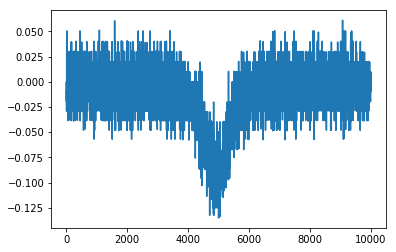

In [36]:
q1 = readlvm("Q/Q-1553.350-01.lvm")
q1 = q1.ravel()
q1 = q1 / taper - 1
#plt.plot(q1)
valley =  q1.min()
valley_index = np.argmin(q1)
q1_valley = q1[valley_index-5000:valley_index+5000]
plt.plot(q1_valley)

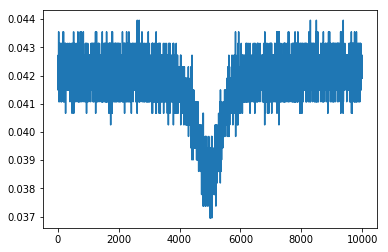

In [5]:
plt.plot(q1_valley)

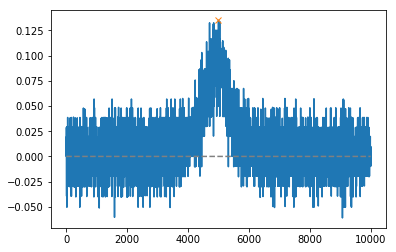

[403.55060061]
{'peak_heights': array([0.13506554])}


In [37]:
from scipy.signal import find_peaks, peak_widths
q1_valley = q1_valley * -1
peaks, peak_info = find_peaks(q1_valley, height=-valley)
results_half = peak_widths(q1_valley, peaks, rel_height=0.5)
plt.plot(q1_valley)
plt.plot(peaks, q1_valley[peaks], "x")
plt.plot(np.zeros_like(q1_valley), "--", color="gray")
plt.show()
print(results_half[0])
print(peak_info)

In [38]:
from lmfit.models import LorentzianModel
mod = LorentzianModel()
x = np.asarray(list(range(0,10000)))
pars = mod.guess(q1_valley, x=x)
out = mod.fit(q1_valley, pars, x=x)

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 71
    # data points      = 10000
    # variables        = 3
    chi-square         = 3.17418796
    reduced chi-square = 3.1751e-04
    Akaike info crit   = -80546.8853
    Bayesian info crit = -80525.2543
[[Variables]]
    sigma:      451.308414 +/- 6.43193067 (1.43%) (init = 4931)
    center:     4942.47752 +/- 4.54183462 (0.09%) (init = 4927.339)
    amplitude:  133.335921 +/- 1.34352527 (1.01%) (init = 3625.379)
    fwhm:       902.616829 +/- 12.8638613 (1.43%) == '2.0000000*sigma'
    height:     0.09404244 +/- 9.4670e-04 (1.01%) == '0.3183099*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.708



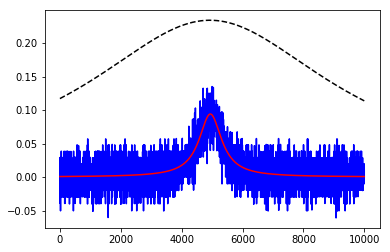

In [39]:
print(out.fit_report())
plt.plot(x, q1_valley, 'b')
plt.plot(x, out.init_fit, 'k--')
plt.plot(x, out.best_fit, 'r-')
plt.show()

In [70]:
res = out.fit_report()
infos = res.split("\n")
fwhm = infos[-5]
fwhm = fwhm.replace(" ", "")
w_res = fwhm.split(":")[1]
w_res = w_res[:w_res.find("+")]

center = infos[-7]
center = center.replace(" ", "")
c_res = center.split(":")[1]
c_res = c_res[:c_res.find("+")]
print(w_res, c_res)

902.616829 4942.47752


In [76]:
l = lambda0 + float(c_res) / taper.size * (time[-1]-time[0]) * slope * modulation_coefficient
d_lambda = float(w_res) / taper.size *  (time[-1]-time[0]) * slope * modulation_coefficient
Q = l / d_lambda
Q

10561587.048998931